In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('wine_dataset.csv')
data

,Wine Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
data.isnull().sum()

Wine Class                      0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [6]:
data.skew()

Wine Class                      0.107431
Alcohol                        -0.051482
Malic acid                      1.039651
Ash                            -0.176699
Alcalinity of ash               0.213047
Magnesium                       1.098191
Total phenols                   0.086639
Flavanoids                      0.025344
Nonflavanoid phenols            0.450151
Proanthocyanins                 0.517137
Color intensity                 0.868585
Hue                             0.021091
OD280/OD315 of diluted wines   -0.307285
Proline                         0.767822
dtype: float64

In [7]:
data.describe()

,Wine Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[1.21394365, 1.51861254, 0.5622498 , ..., 0.36217728, 1.84791957,
        1.01300893],
       [1.21394365, 0.24628963, 0.49941338, ..., 0.40605066, 1.1134493 ,
        0.96524152],
       [1.21394365, 0.19687903, 0.02123125, ..., 0.31830389, 0.78858745,
        1.39514818],
       ...,
       [1.37386437, 0.33275817, 1.74474449, ..., 1.61212515, 1.48544548,
        0.28057537],
       [1.37386437, 0.20923168, 0.22769377, ..., 1.56825176, 1.40069891,
        0.29649784],
       [1.37386437, 1.39508604, 1.58316512, ..., 1.52437837, 1.42894777,
        0.59516041]])

In [9]:
threshold=3
print(np.where(z>3))

(array([ 25,  59,  69,  73,  95, 110, 115, 121, 121, 123, 158], dtype=int64), array([ 3,  3,  5,  4,  5,  9, 11,  3,  7,  2, 10], dtype=int64))


In [10]:
data_new=data[(z<3).all(axis=1)]

In [11]:
data_new

,Wine Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [12]:
data.shape

(178, 14)

In [13]:
data_new.shape

(168, 14)

In [14]:
cor=data_new.corr()
cor

,Wine Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Wine Class,1.000000,-0.358159,0.466193,-0.041083,0.572880,-0.237956,-0.750019,-0.884289,0.507436,-0.577886,0.255763,-0.648309,-0.802703,-0.644164
Alcohol,-0.358159,1.000000,0.094430,0.208414,-0.355508,0.384287,0.335947,0.299956,-0.182249,0.215285,0.531866,-0.008638,0.111289,0.657493
Malic acid,0.466193,0.094430,1.000000,0.201007,0.322212,0.001273,-0.374547,-0.473367,0.325362,-0.277069,0.287016,-0.568239,-0.407781,-0.185601
Ash,-0.041083,0.208414,0.201007,1.000000,0.357721,0.356159,0.098304,0.025495,0.126694,0.010541,0.220942,-0.069079,-0.052576,0.239357
Alcalinity of ash,0.572880,-0.355508,0.322212,0.357721,1.000000,-0.200760,-0.450440,-0.507554,0.374967,-0.328975,-0.019411,-0.336831,-0.382824,-0.495569
Magnesium,-0.237956,0.384287,0.001273,0.356159,-0.200760,1.000000,0.211757,0.190958,-0.244526,0.127911,0.307082,-0.012432,0.013432,0.427490
Total phenols,-0.750019,0.335947,-0.374547,0.098304,-0.450440,0.211757,1.000000,0.877229,-0.483101,0.632662,-0.062974,0.477061,0.705393,0.526889
Flavanoids,-0.884289,0.299956,-0.473367,0.025495,-0.507554,0.190958,0.877229,1.000000,-0.597009,0.717248,-0.183253,0.601116,0.787549,0.534005
Nonflavanoid phenols,0.507436,-0.182249,0.325362,0.126694,0.374967,-0.244526,-0.483101,-0.597009,1.000000,-0.403707,0.103243,-0.282470,-0.524213,-0.317344
Proanthocyanins,-0.577886,0.215285,-0.277069,0.010541,-0.328975,0.127911,0.632662,0.717248,-0.403707,1.000000,-0.021908,0.344582,0.554727,0.380451


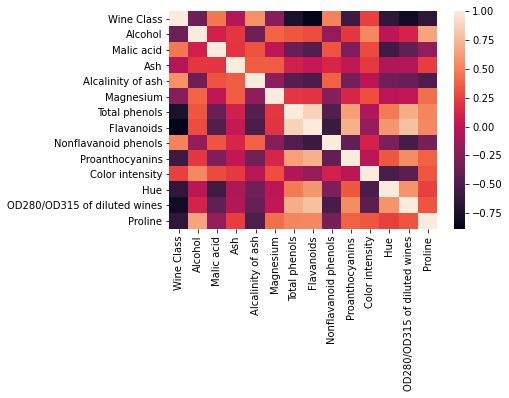

In [15]:
sns.heatmap(cor)

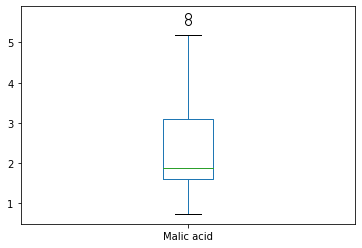

In [16]:
data_new['Malic acid'].plot.box()

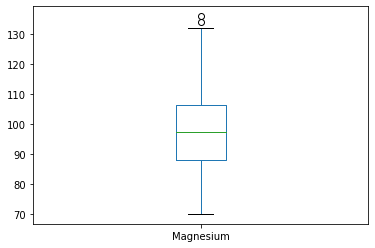

In [17]:
data_new['Magnesium'].plot.box()

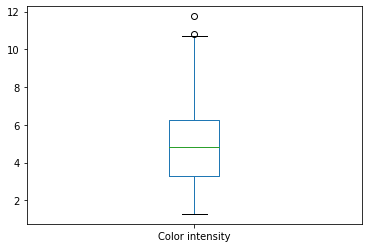

In [18]:
data_new['Color intensity'].plot.box()

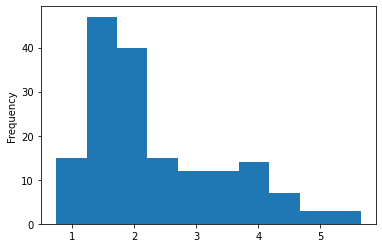

In [19]:
data_new['Malic acid'].plot.hist()

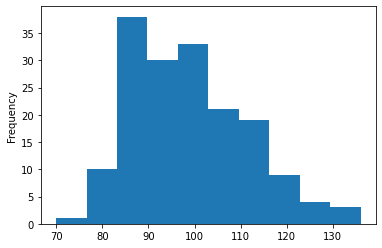

In [20]:
data_new['Magnesium'].plot.hist()

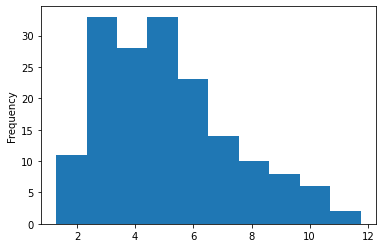

In [21]:
data_new['Color intensity'].plot.hist()

In [22]:
import numpy as np
data_new['Malic acid']=np.log(data_new['Malic acid'])

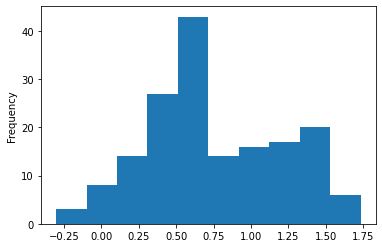

In [23]:
data_new['Malic acid'].plot.hist()

In [25]:
data_new['Color intensity']=np.log(data_new['Color intensity'])

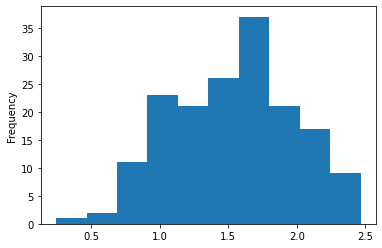

In [26]:
data_new['Color intensity'].plot.hist()

In [27]:
data_new['Magnesium']=np.log(data_new['Magnesium'])

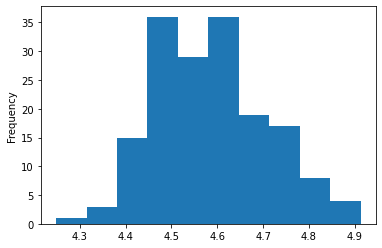

In [28]:
data_new['Magnesium'].plot.hist()

In [29]:
data_new.skew()

Wine Class                      0.117053
Alcohol                        -0.028038
Malic acid                      0.231880
Ash                            -0.250438
Alcalinity of ash               0.104774
Magnesium                       0.257350
Total phenols                   0.132108
Flavanoids                     -0.077205
Nonflavanoid phenols            0.481810
Proanthocyanins                 0.360217
Color intensity                -0.165416
Hue                            -0.137430
OD280/OD315 of diluted wines   -0.282514
Proline                         0.744773
dtype: float64

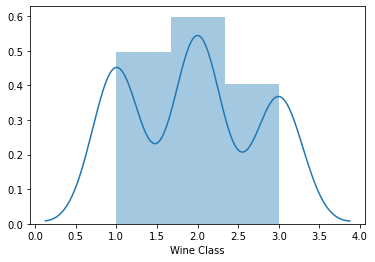

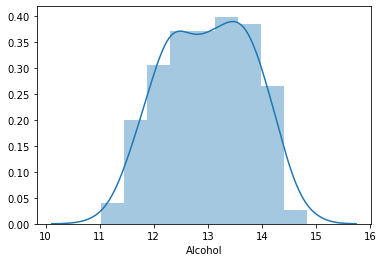

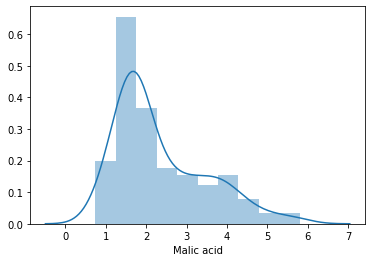

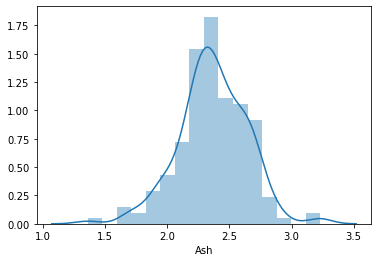

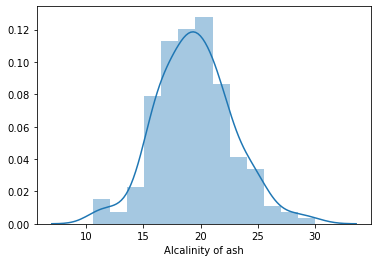

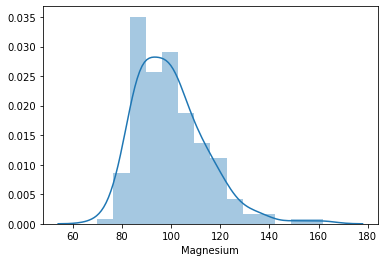

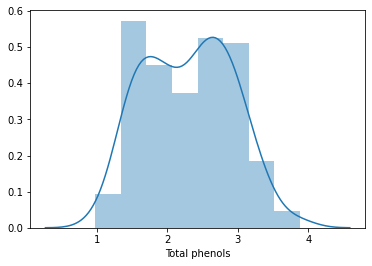

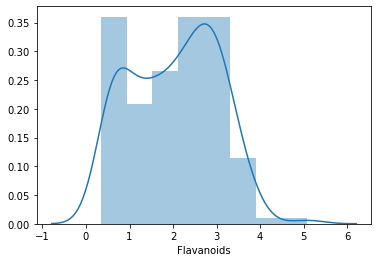

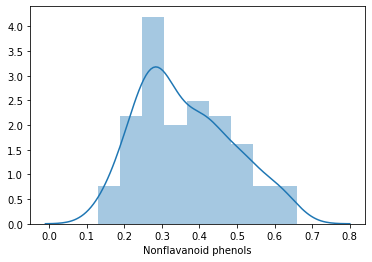

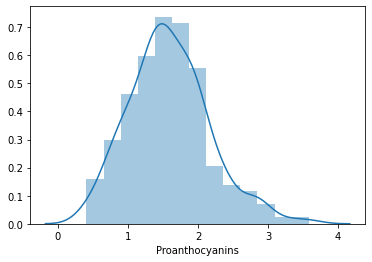

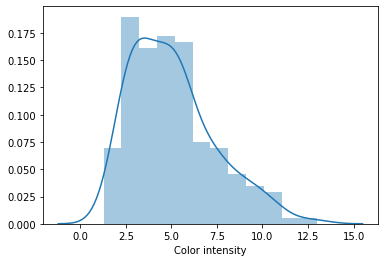

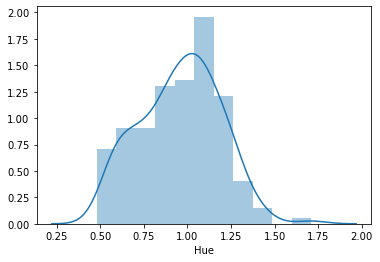

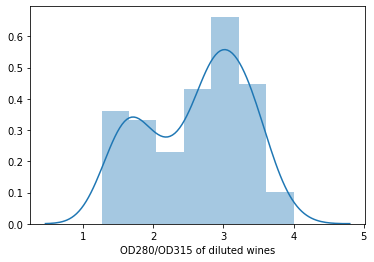

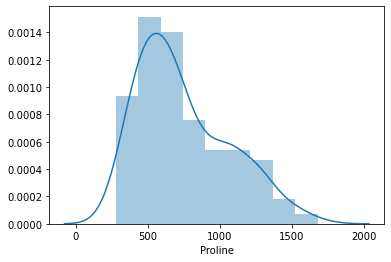

In [30]:
for i in data_new.columns:
    plt.figure()
    sns.distplot(data[i])

<Figure size 576x432 with 0 Axes>

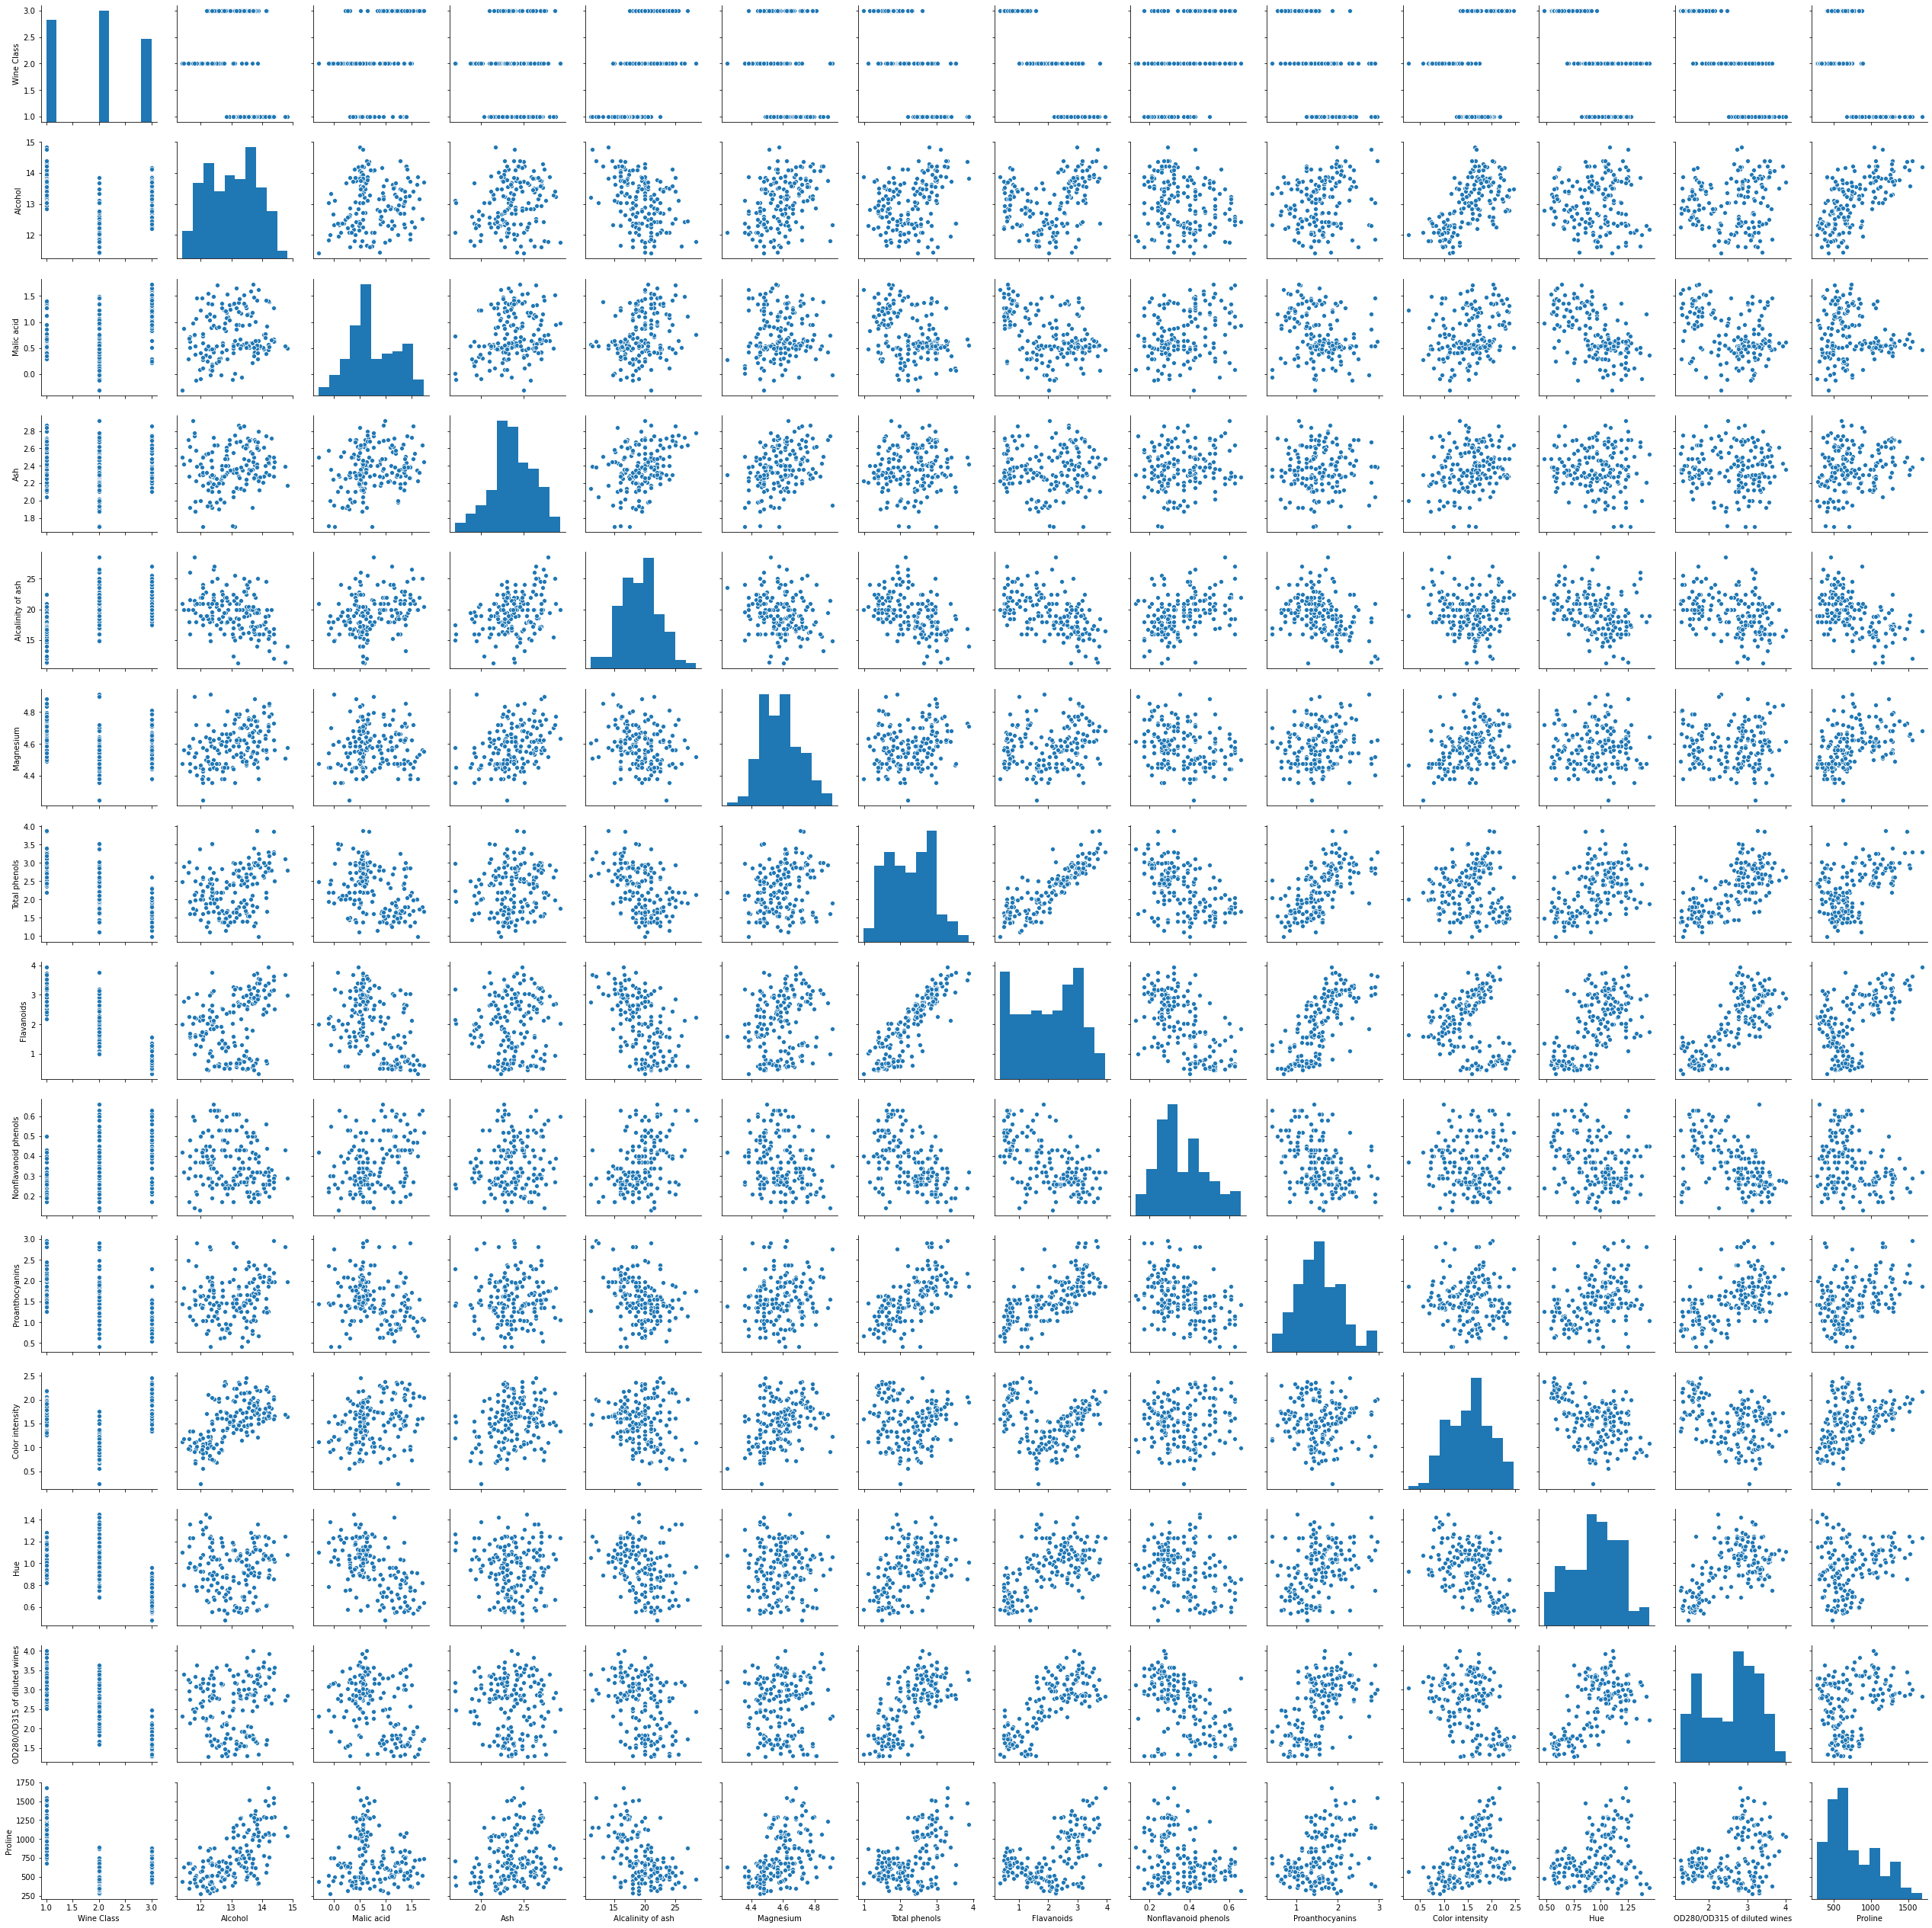

In [31]:
plt.figure(figsize=(8,6))
sns.pairplot(data_new)

In [32]:
x=data_new.iloc[:,1:14]
x

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,0.536493,2.43,15.6,4.844187,2.80,3.06,0.28,2.29,1.729884,1.04,3.92,1065
1,13.20,0.576613,2.14,11.2,4.605170,2.65,2.76,0.26,1.28,1.477049,1.05,3.40,1050
2,13.16,0.858662,2.67,18.6,4.615121,2.80,3.24,0.30,2.81,1.736951,1.03,3.17,1185
3,14.37,0.667829,2.50,16.8,4.727388,3.85,3.49,0.24,2.18,2.054124,0.86,3.45,1480
4,13.24,0.951658,2.87,21.0,4.770685,2.80,2.69,0.39,1.82,1.463255,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,1.731656,2.45,20.5,4.553877,1.68,0.61,0.52,1.06,2.041220,0.64,1.74,740
174,13.40,1.363537,2.48,23.0,4.624973,1.80,0.75,0.43,1.41,1.987874,0.70,1.56,750
175,13.27,1.453953,2.26,20.0,4.787492,1.59,0.69,0.43,1.35,2.322388,0.59,1.56,835
176,13.17,0.951658,2.37,20.0,4.787492,1.65,0.68,0.53,1.46,2.230014,0.60,1.62,840


In [33]:
y=data_new.iloc[:,0]
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine Class, Length: 168, dtype: int64

In [34]:
x.shape

(168, 13)

In [35]:
y.shape

(168,)

In [36]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x=pd.DataFrame(data=x)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.513539,-0.481876,0.250637,-1.209653,2.081214,0.840250,1.068668,-0.669081,1.395565,0.433995,0.403766,1.857453,0.980537
1,0.210929,-0.391659,-0.945351,-2.624711,0.161495,0.600640,0.763248,-0.830933,-0.517348,-0.131747,0.449249,1.127605,0.933414
2,0.160342,0.242578,1.240421,-0.244840,0.241413,0.840250,1.251920,-0.507230,2.380432,0.449808,0.358284,0.804788,1.357515
3,1.690593,-0.186543,0.539324,-0.823728,1.143114,2.517517,1.506437,-0.992784,1.187228,1.159510,-0.414920,1.197783,2.284254
4,0.261516,0.451697,2.065240,0.527010,1.490862,0.840250,0.691983,0.221100,0.505398,-0.162610,0.403766,0.467935,-0.056154
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.855910,2.205662,0.333119,0.366208,-0.250479,-0.948835,-1.425598,1.273133,-0.934022,1.130637,-1.415537,-1.202294,-0.040447
164,0.463863,1.377882,0.456842,1.170218,0.320544,-0.757147,-1.283068,0.544803,-0.271131,1.011271,-1.142641,-1.454934,-0.009032
165,0.299456,1.581198,-0.450459,0.205406,1.625852,-1.092601,-1.344152,0.544803,-0.384770,1.759775,-1.642949,-1.454934,0.257995
166,0.172989,0.451697,0.003191,0.205406,1.625852,-0.996757,-1.354333,1.354059,-0.176433,1.553081,-1.597467,-1.370721,0.273702


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=48) 

In [38]:
x_train.shape

(117, 13)

In [39]:
x_test.shape

(51, 13)

In [40]:
y_train.shape

(117,)

In [41]:
y_test.shape

(51,)

In [52]:
model=[SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB()]

for m in model:
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print('Confusion matrix of',m,'is:')
    print(confusion_matrix(y_test,predm))
    print('\n')

0.9914529914529915
Accuracy score of SVC() is:
0.9803921568627451
Confusion matrix of SVC() is:
[[16  0  0]
 [ 0 15  0]
 [ 0  1 19]]


1.0
Accuracy score of DecisionTreeClassifier() is:
0.8823529411764706
Confusion matrix of DecisionTreeClassifier() is:
[[15  1  0]
 [ 1 14  0]
 [ 1  3 16]]


0.9743589743589743
Accuracy score of KNeighborsClassifier() is:
1.0
Confusion matrix of KNeighborsClassifier() is:
[[16  0  0]
 [ 0 15  0]
 [ 0  0 20]]


0.9914529914529915
Accuracy score of GaussianNB() is:
1.0
Confusion matrix of GaussianNB() is:
[[16  0  0]
 [ 0 15  0]
 [ 0  0 20]]




In [55]:
#here the best model is GaussianNB(),so I will save it into the external file for future reference to predict result
import joblib
gnb=GaussianNB()
gnb.fit(x_train,y_train)
joblib.dump(gnb,'filegnb.obj')
homefile=joblib.load('filegnb.obj')
homefile.predict(x_test)

array([2, 3, 1, 2, 2, 3, 1, 2, 3, 3, 3, 3, 1, 2, 3, 2, 2, 1, 2, 3, 3, 2,
       3, 3, 3, 1, 1, 2, 2, 3, 1, 3, 1, 1, 2, 1, 3, 3, 1, 3, 1, 1, 1, 2,
       3, 2, 3, 1, 3, 1, 2], dtype=int64)